# Cartoon Filter with OpenCV
### Project by Noirin Graham and Michael Scheidegger

This project is a cartoon filter that takes an image and applies a cartoon effect to it. The cartoon effect is achieved by first applying a bilateral filter to the image to smooth it out and reduce noise. Then, the edges of the image are detected using a Canny edge detector. Finally, the edges are combined with the original image to create a cartoon effect.

The project is implemented using OpenCV, a popular computer vision library. OpenCV provides a wide range of functions for image processing, including filtering, edge detection, and image blending. By combining these functions, we can create a cartoon filter that transforms an image into a cartoon-like representation.

- Required Libraries:
    - OpenCV
    - Numpy
    - Matplotlib

For better comment readability, the [Better Comments](https://marketplace.visualstudio.com/items?itemName=aaron-bond.better-comments) extension is used in this notebook. We recommend installing this extension for better readability.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output

Quellen:
https://www.kaggle.com/code/bhuviranga/cartoonify-image-step-by-step-guide

https://en.wikipedia.org/wiki/Kernel_(image_processing)


# Reading in Images for building filter


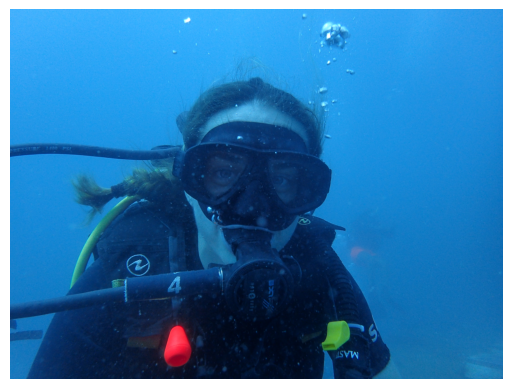

In [2]:
# Load image
image = cv2.imread('P8160078.JPG')

# Display image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Look as the array of the image


In [3]:
# Show shape of image
image.shape

(3456, 4608, 3)

# Resining Image & Noise Removal


# Image Manipulation


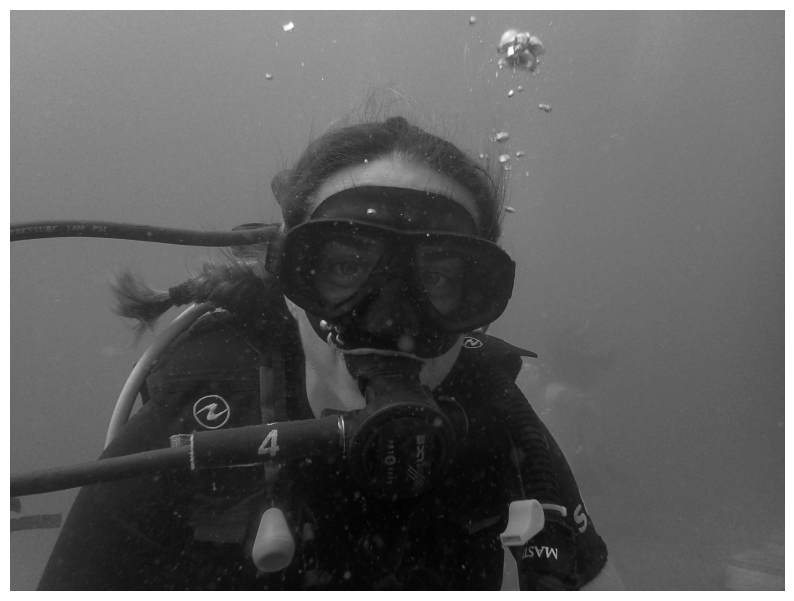

In [4]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gray, cmap='gray')
ax.axis('off')
plt.show()


# Filtering


Try out diffrent kernals, to see which one would make a cartoon like output.


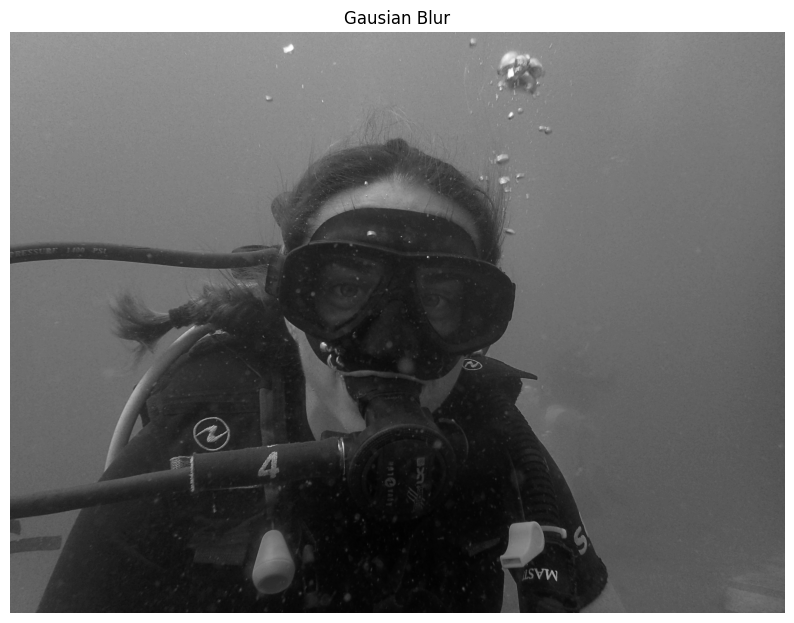

In [5]:
# Gausian Blur 

# Create kernal
kernal_gausian_blur = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16

# Apply kernal
gausian_blur = cv2.filter2D(gray, -1, kernal_gausian_blur)

# Display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(gausian_blur, cmap='gray')
ax.axis('off')
ax.set_title('Gausian Blur')
plt.show()

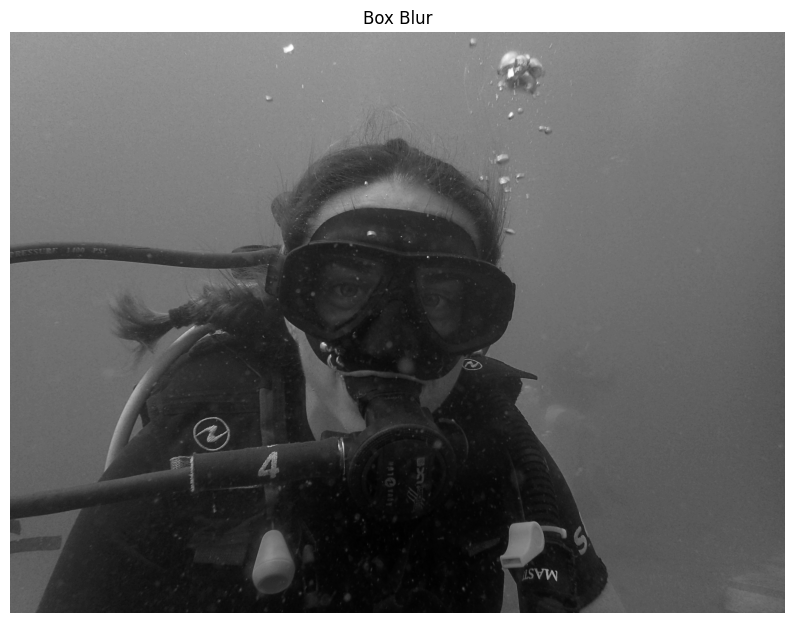

In [6]:
#Box blur

# Create kernal
kernal_box_blur = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9

# Apply kernal
box_blur = cv2.filter2D(gray, -1 , kernal_box_blur)

# Display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(box_blur, cmap='gray')
ax.axis('off')
ax.set_title('Box Blur')
plt.show()

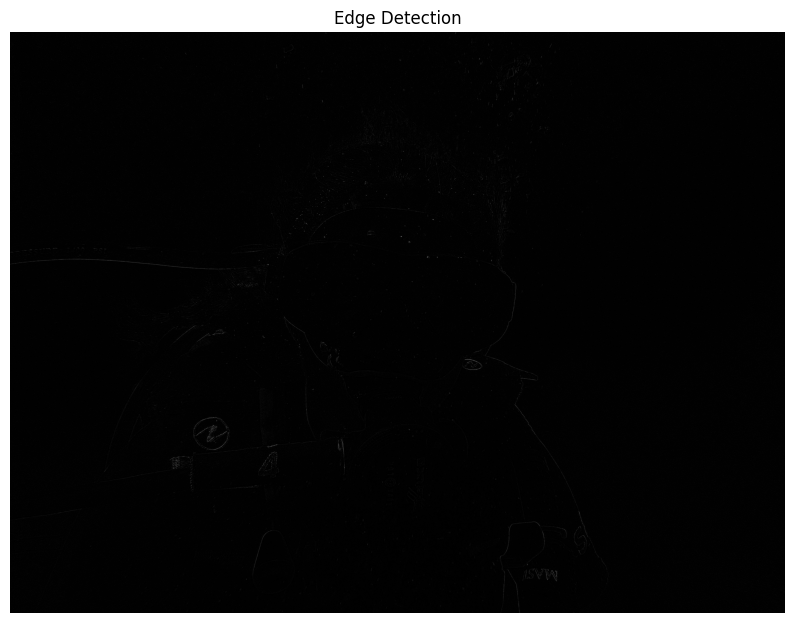

In [7]:
# Edge detection

# Creat kernal
kernal_edge_detection = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Apply kernal
edge_detection = cv2.filter2D(box_blur, -1, kernal_edge_detection)

# Display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(edge_detection, cmap='gray')
ax.axis('off')
ax.set_title('Edge Detection')
plt.show()

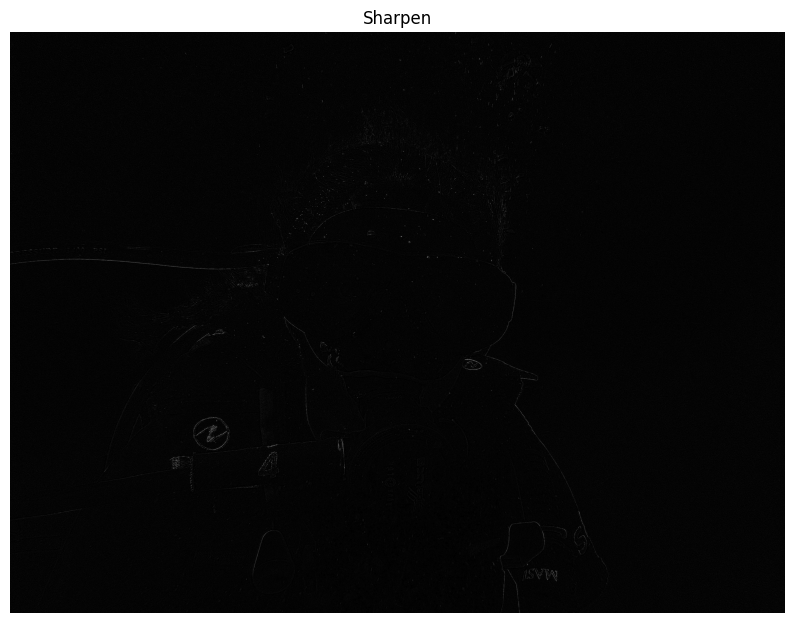

In [8]:
# sharpen

# Create kernal
kernal_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

# Apply kernal
sharpen = cv2.filter2D(edge_detection, -1, kernal_sharpen)

# Display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(sharpen, cmap='gray')
ax.axis('off')
ax.set_title('Sharpen')
plt.show()

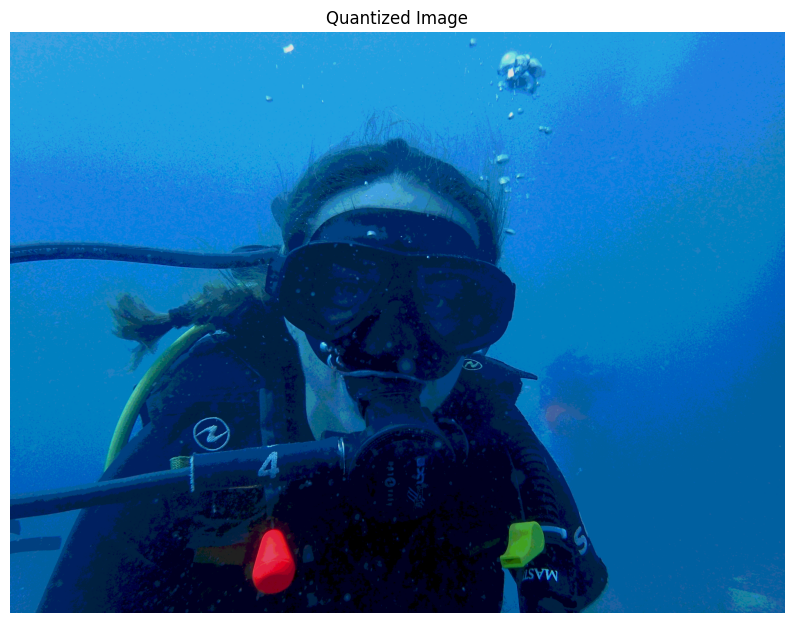

In [9]:
import numpy as np

def quantize(image, nbits):
    """Method 1: 
    Quantize an image to a lower number of bits. The image must be
    in uint8 format. The number of bits must be between 1 and 8.
    The function works for an arbitrary number of channels.
    """
    assert image.dtype == np.uint8, "Image must be uint8"
    assert nbits > 0 and nbits <= 8, "Invalid number of bits"
    
    # Split the image into its RGB channels
    r_channel, g_channel, b_channel = image[:,:,0], image[:,:,1], image[:,:,2]
    
    # Create equally sized bins for the 256 levels (per channel)
    bins = np.arange(0, 256+1, 256 // 2**nbits)
    
    # Quantize each channel separately
    ret_r = np.digitize(r_channel, bins) - 1
    ret_g = np.digitize(g_channel, bins) - 1
    ret_b = np.digitize(b_channel, bins) - 1
    
    # Multiply the bin indices with the bin width
    ret_r *= (256 // 2**nbits)
    ret_g *= (256 // 2**nbits)
    ret_b *= (256 // 2**nbits)
    
    # Merge the channels back into an RGB image
    quantized_image = np.stack((ret_r, ret_g, ret_b), axis=-1)
    
    return quantized_image.astype(np.uint8)

rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Lower the bit depth of the image
quantized = quantize(rgb_image, nbits=3)

# Display image
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(quantized)
ax.axis('off')
ax.set_title('Quantized Image')
plt.show()



# Creat a function with all the elements


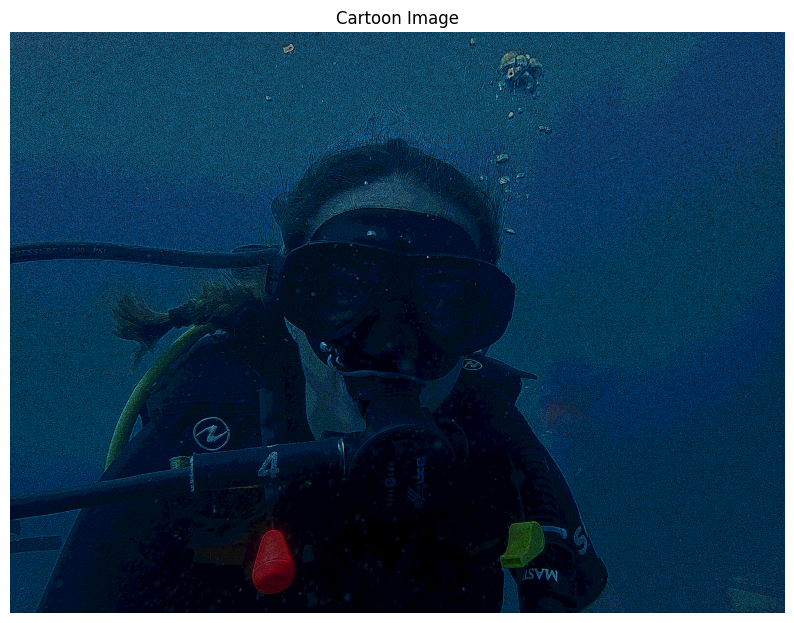

In [10]:
#import image
image = cv2.imread('P8160078.JPG')
# kernals
kernal_box_blur = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]) / 9
kernal_edge_detection = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kernal_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

def cartoon_filter(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_quantized = quantize(image, nbits=3)
    box_blur = cv2.filter2D(gray, -1 , kernal_box_blur)
    edge_detection = cv2.filter2D(box_blur, -1, kernal_edge_detection)
    cartoon_image = cv2.bitwise_and(image_quantized, image_quantized, mask=edge_detection)

    return cartoon_image


fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(cartoon_filter(image))
ax.axis('off')
ax.set_title('Cartoon Image')
plt.show()




# Live Stream

The code below is for the live stream of the camera. The code will take the live stream and apply the cartoon filter to the live stream.

There are two ways to achieve this:
- Using the edge_filter_kernel function, which uses the custom kernel of the gaussian blur filter
- Using the edge_filter function which uses the cv2.bilateralFilter function

In [11]:
gausian_blur_9x9_kernel = np.array([[1, 2, 3, 2, 1], [2, 4, 6, 4, 2], [3, 6, 9, 6, 3], [2, 4, 6, 4, 2], [1, 2, 3, 2, 1]]) / 81
gausian_blur_15x15_kernel = np.array([[1, 2, 3, 4, 5, 4, 3, 2, 1], [2, 4, 6, 8, 10, 8, 6, 4, 2], [3, 6, 9, 12, 15, 12, 9, 6, 3], [4, 8, 12, 16, 20, 16, 12, 8, 4], [5, 10, 15, 20, 25, 20, 15, 10, 5], [4, 8, 12, 16, 20, 16, 12, 8, 4], [3, 6, 9, 12, 15, 12, 9, 6, 3], [2, 4, 6, 8, 10, 8, 6, 4, 2], [1, 2, 3, 4, 5, 4, 3, 2, 1]]) / 331
canny_edge_detection_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
thickerLines_kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
dilate_kernel = np.ones((2,2), np.uint8)

def edge_filter_kernels(image, var1, var2):
    """
    Apply edge detection to an image using the Canny edge detection algorithm. But first apply a gausian blur to the image with a 15x15 kernel.
    
    Args:
        image (np.uint8): Input image.
        var1 (int): First threshold for the hysteresis procedure.
        var2 (int): Second threshold for the hysteresis procedure.
        kernel_size (int): Size of the Gaussian kernel.
    """
    assert var1 < var2, "Threshold 1 must be less than threshold 2"
    
    # Convert the image to grayscale for edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.filter2D(gray, -1, gausian_blur_15x15_kernel)
    
    # Perform edge detection with adjusted thresholds for increased sensitivity
    edge_detection = cv2.Canny(blurred, var1, var2)
    
    # Dilate the edges to make lines thicker
    kernel = np.ones((2,2), np.uint8)
    dilated_edges = cv2.dilate(edge_detection, kernel, iterations=1)
    
    # Invert the dilated edges
    dilated_edges = cv2.bitwise_not(dilated_edges)
    
    return dilated_edges



def edge_filter(image, var1, var2, kernel_size=15):
    """
    Apply edge detection to an image using the Canny edge detection algorithm. But first apply a gausian blur to the image with the blur function.
    
    Args:
        image (np.uint8): Input image.
        var1 (int): First threshold for the hysteresis procedure.
        var2 (int): Second threshold for the hysteresis procedure.
        kernel_size (int): Size of the Gaussian kernel.
    """
    assert kernel_size % 2 == 1, "Kernel size must be odd"
    assert var1 < var2, "Threshold 1 must be less than threshold 2"
    assert kernel_size > 0, "Kernel size must be positive"

    # Convert the image to grayscale for edge detection
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    
    # Perform edge detection with adjusted thresholds for increased sensitivity
    edge_detection = cv2.Canny(blurred, var1, var2)
    
    # Dilate the edges to make lines thicker
    kernel = np.ones((2,2), np.uint8)
    dilated_edges = cv2.dilate(edge_detection, kernel, iterations=1)
    
    # Invert the dilated edges
    dilated_edges = cv2.bitwise_not(dilated_edges)
    
    return dilated_edges


def quantize(image, nbits = 3):
    """
    Quantize an image to a lower number of bits. The image must be in uint8 format. The number of bits must be between 1 and 8.
    The function works for an arbitrary number of channels.

    Args:
        image (np.uint8): Input image.
        nbits (int): Number of bits for quantization.
    """
    assert image.dtype == np.uint8, "Image must be uint8"
    assert nbits > 0 and nbits <= 8, "Invalid number of bits"
    
    # Split the image into its RGB channels
    r_channel, g_channel, b_channel = image[:,:,0], image[:,:,1], image[:,:,2]
    
    # Create equally sized bins for the 256 levels (per channel)
    bins = np.arange(0, 256+1, 256 // 2**nbits)
    
    # Quantize each channel separately
    ret_r = np.digitize(r_channel, bins) - 1
    ret_g = np.digitize(g_channel, bins) - 1
    ret_b = np.digitize(b_channel, bins) - 1
    
    # Multiply the bin indices with the bin width
    ret_r *= (256 // 2**nbits)
    ret_g *= (256 // 2**nbits)
    ret_b *= (256 // 2**nbits)
    
    # Merge the channels back into an RGB image
    quantized_image = np.stack((ret_r, ret_g, ret_b), axis=-1)
    
    return quantized_image.astype(np.uint8)


def run_camera_cv(cam_id, 
                  window_name="Webcam", 
                  show_ontop=True,
                  width=640,
                  height=480,
                  flip=False, 
                  **kwargs):
    """Run a camera feed and display it using OpenCV.

    Args:
        cam_id (int): Camera ID (usually 0).
        window_name (str): Name of the window.
        width (int): Width of the window.
        height (int): Height of the window.
        flip (bool): Flip the image horizontally.
        **kwargs: Keyword arguments for the function.
    """

    # Define the default values for the parameters
    var1 = 30 # ? This is the first threshold for the edge detection
    var2 = 70 # ? This is the second threshold for the edge detection
    kernel_size = 9 # ? This is the size of the kernel for the edge detection
    nbits = 3 # ? This is the number of bits for the quantization
    smoothing_factor=0.4 # ? This is the smoothing factor for the previous frame
    # This values are assessed by trial and error :)

    # Define the overlay text
    overlay_text_cotrols = "Controls (+/-):"
    overlay_text_var1 = "E/D - var1"
    overlay_text_var2 = "W/S - var2"
    overlay_text_kernel_size = "R/F - kernel_size"
    overlay_text_nbits = "T/G - nbits"
    overlay_text_smoothing_factor = "Z/H - smoothing_factor"
    overlay_text_quit = "Q - Quit"
    overlay_text_toggle = "A - Toggle Overlay"

    # Show overlay by default
    show_overlay = True

    cap = cv2.VideoCapture(cam_id)
    success, prev_frame = cap.read()  # Read the first frame
    prev_frame = cv2.resize(prev_frame, (width, height))  # Resize the frame


    # Adjust the camera settings (may work, or not)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, width)  # adjust width
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, height)  # adjust height

    # Create named window
    cv2.namedWindow(window_name, cv2.WINDOW_AUTOSIZE)
    # Make the window always on top
    if show_ontop:
        cv2.setWindowProperty(window_name, cv2.WND_PROP_TOPMOST, 1)

    try:
        while True:
            # Read image from capturing device
            success, img = cap.read()
            if not success:
                break
            if flip:
                img = cv2.flip(img, 1)

            # Smooth the current frame with the previous frame
            img_smooth = cv2.addWeighted(img, 1 - smoothing_factor, prev_frame, smoothing_factor, 0)

            # Update the previous frame for the next iteration
            prev_frame = img_smooth.copy()

            img_smooth = cv2.GaussianBlur(img_smooth, (5, 5), 0)
            img = cv2.GaussianBlur(img, (5, 5), 0)
            
            # Apply cartoon filter to get white pixels
            # ? This is with the old edge_filter function which uses not the smoothing kernel but the function
            white_pixels = edge_filter(img_smooth, var1, var2, kernel_size) 
            # ? This is with the new edge_filter_kernels function which uses the smoothing kernel
            #white_pixels = edge_filter_kernels(img_smooth, var1, var2)

            # Apply quantize filter to the original image
            quantized_image = quantize(img, nbits)

            # Merge the white pixels of cartoon filter with quantized image
            img = cv2.bitwise_and(quantized_image, quantized_image, mask=white_pixels)

            # Add overlay text
            overlay_text = f"var1: {var1} var2: {var2} kernel_size: {kernel_size} nbits: {nbits} smoothing_factor: {smoothing_factor}"

            if show_overlay:
                # Create a background for the overlay text (seethrough black rectangle)
                cv2.rectangle(img, (0, 0), (180, 190), (0, 0, 0), -1)
                cv2.rectangle(img, (0, 0), (430, 30), (0, 0, 0), -1)

                cv2.putText(img, overlay_text, (10, 15), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)

                cv2.putText(img, overlay_text_cotrols, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_toggle, (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_smoothing_factor, (10, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_kernel_size, (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_var1, (10, 120), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_var2, (10, 140), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_nbits, (10, 160), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)
                cv2.putText(img, overlay_text_quit, (10, 180), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (125, 205, 100), 1)

            watermark_text = "by Noirin / Michael"
            cv2.putText(img, watermark_text, (10, 470), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (125, 205, 100), 1)
            
            # Display the image in the named window
            cv2.imshow(window_name, img)
            # Wait and fetch for key input (the above window should be selected)
            key = cv2.waitKey(1) & 0xFF
            # Quit if "q" or "Q" is pressed.
            if key in (ord("q"), ord("Q")): 
                cap.release()
                break
            elif key in (ord("w"), ord("W")) and var2 < 255:
                var2 += 10
            elif key in (ord("s"), ord("S")) and var2 > 0:
                var2 -= 10
            elif key in (ord("e"), ord("E")) and var1 < 255:
                var1 += 10
            elif key in (ord("d"), ord("D")) and var1 > 0:
                var1 -= 10
            elif key in (ord("r"), ord("R")) and kernel_size < 20:
                kernel_size += 2
            elif key in (ord("f"), ord("F")) and kernel_size >= 3:
                kernel_size -= 2
            elif key in (ord("t"), ord("T")) and nbits < 8:
                nbits += 1
            elif key in (ord("g"), ord("G")) and nbits > 1:
                nbits -= 1
            elif key in (ord("z"), ord("Z")) and smoothing_factor < 1.0:
                smoothing_factor += 0.1
            elif key in (ord("h"), ord("H")) and smoothing_factor > 0.0:
                smoothing_factor -= 0.1
            elif key in (ord("a"), ord("A")):
                show_overlay = not show_overlay

            # clear log and print new values
            clear_output(wait=True)

            print(f"var1: {var1}")
            print(f"var2: {var2}")
            print(f"kernel_size: {kernel_size}")
            print(f"nbits: {nbits}")
            print(f"smoothing_factor: {smoothing_factor}")

    except KeyboardInterrupt:
        pass
    finally:
        # We should always release the camera
        cap.release()
        # Comment out the following lines if you want to keep the window open
        cv2.destroyAllWindows() 
        cv2.waitKey(1)

In [12]:
###################
# Run the camera! #
###################

# Choose the camera
cam_id = 0

# Window name
window_name = "Webcam Cartoon Filter"

# Flip the image
flip = True

# Run the camera!
run_camera_cv(cam_id, 
              window_name=window_name, 
              flip=flip)

var1: 30
var2: 70
kernel_size: 9
nbits: 3
smoothing_factor: 0.4
